### MNIST Classifier

In this notebook, we will implement a CNN classifier to classify all the 10 digits the MNIST dataset. The objective of this lesson is twofold:
* To build our first CNN classifier.
* To use cross-entropy as classification loss.

Let's start with the ususal imports.

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

#### Dataset Loading

We have already inspected the MNIST dataset. We are going to load it now since we are going to use it for training the classifier.

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

28
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


#### Building the Classifier

We are going to build the same CNN classifier as before but note that we are using the softmax activation in the last layer (classification head).

In [6]:
inputs = Input(shape=(size, size, 1))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,810 (50.04 KB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 0 (0.00 B)

#### Training

Let's now compile and train the model. We will use the cross-entropy loss for this task. And note that we can use the built-in accuracy metric for monitoring the training.

In [7]:
epochs = 25
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7877 - loss: 0.7847 - val_accuracy: 0.9698 - val_loss: 0.1090
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9659 - loss: 0.1150 - val_accuracy: 0.9777 - val_loss: 0.0817
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9759 - loss: 0.0812 - val_accuracy: 0.9790 - val_loss: 0.0741
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9802 - loss: 0.0652 - val_accuracy: 0.9805 - val_loss: 0.0671
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9830 - loss: 0.0555 - val_accuracy: 0.9827 - val_loss: 0.0607
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9852 - loss: 0.0489 - val_accuracy: 0.9838 - val_loss: 0.0553
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9866 - loss: 0.0437 - val_accuracy: 0.9842 - val_loss: 0.0507
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9880 - loss: 0.0396 - val_accuracy: 0.

Let's now plot the history to see the evolution of the training.

Train Acc      0.99742591381073
Validation Acc 0.9886666536331177


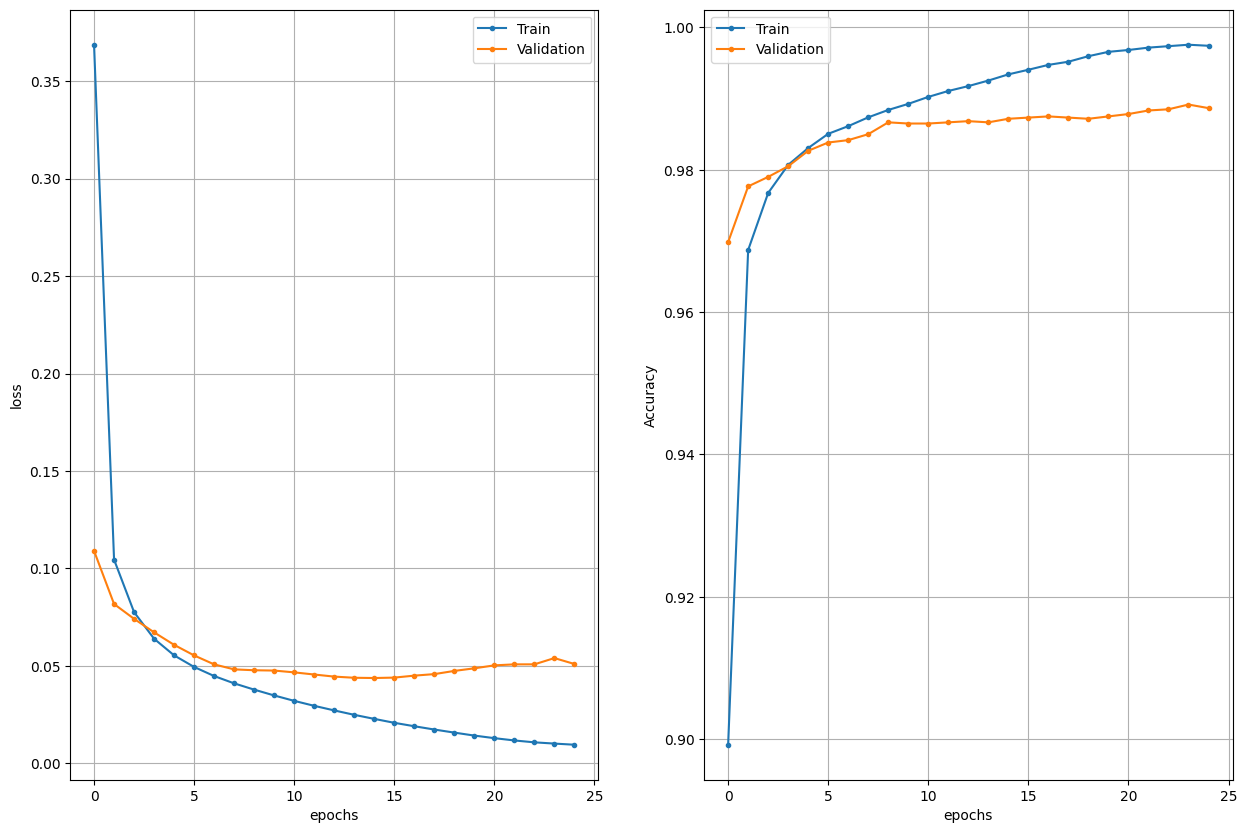

In [8]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

We have obtained an overall accuracy of about 99%. This might seem lower than we obtained using the binary classifier before but remember we are now classifying **all 10 digits**.

In [9]:
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
True [7 2 1 0 4]
Pred [7 2 1 0 4]
Pred [[1.28074846e-14 3.86208556e-12 1.87305241e-11 3.88740179e-10
  4.22262576e-21 1.59642343e-15 1.73307108e-25 1.00000000e+00
  2.80600602e-13 7.70673629e-12]
 [8.38886339e-12 3.20858895e-10 1.00000000e+00 1.04049459e-14
  7.12197156e-22 1.21363441e-21 2.47716236e-12 1.75470564e-16
  5.38771944e-11 1.21006959e-22]
 [3.81689302e-09 9.99938965e-01 5.95267018e-08 1.53904476e-11
  4.88365076e-05 2.20157359e-09 4.67315575e-10 3.64109269e-06
  8.43102771e-06 1.09458898e-09]
 [1.00000000e+00 4.62815195e-23 1.70440729e-13 5.42835661e-20
  1.07854772e-14 1.95894326e-15 4.42747083e-09 1.01653955e-13
  5.32138928e-14 2.52378146e-15]
 [4.42318785e-18 9.06593459e-17 5.52095059e-14 1.04352812e-13
  1.00000000e+00 8.04785988e-17 5.59494400e-14 8.30513634e-16
  4.75040146e-12 6.61109167e-10]]
(10000, 10)


In [10]:
digits = range(0, 10)
y_pred = np.argmax(y_pred, axis=1)

for digit in digits:
    mask = y_true == digit
    
    tp = np.sum(y_pred[mask] == digit)
    total = np.sum(mask)
    
    print('Digit-', digit, ' acc', tp/total)
    
print('y_true', y_true[mask])
print('y_pred', y_pred[mask])

Digit- 0  acc 0.9959183673469387
Digit- 1  acc 0.9955947136563876
Digit- 2  acc 0.9883720930232558
Digit- 3  acc 0.9920792079207921
Digit- 4  acc 0.9979633401221996
Digit- 5  acc 0.9831838565022422
Digit- 6  acc 0.9874739039665971
Digit- 7  acc 0.9883268482490273
Digit- 8  acc 0.9804928131416838
Digit- 9  acc 0.9732408325074331
y_true [9 9 9 ... 9 9 9]
y_pred [9 9 9 ... 9 9 9]


The trained model can also be quickly evaluated by calling the evaluate method on the test data. It will return the loss and the metric (or metrics).

In [11]:
ev = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9860 - loss: 0.0574


In [12]:
print('Test loss  ', ev[0])
print('Test metric', ev[1])

Test loss   0.04791298136115074
Test metric 0.9883999824523926


We now visualise some of the evaluation results.

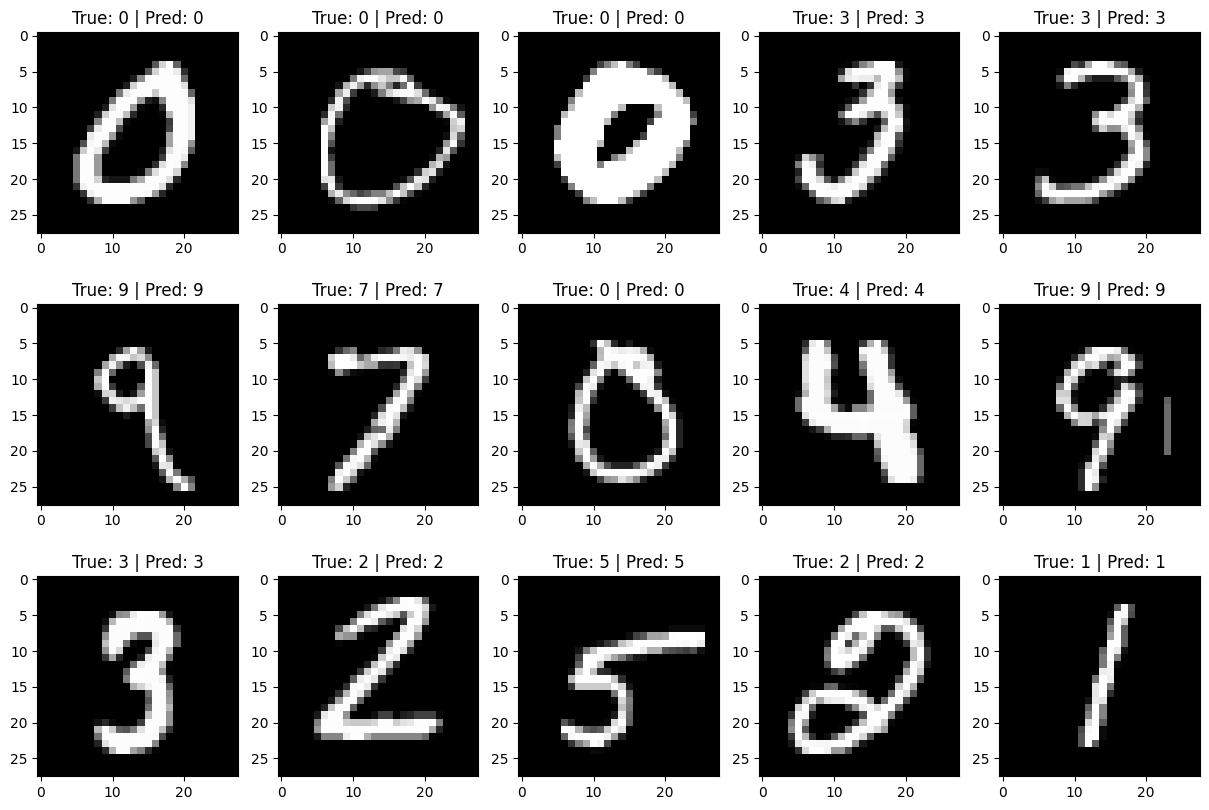

In [13]:
for ii in range(15):
    idx = np.random.randint(0, len(y_pred))
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...], cmap='gray')
    plt.title('True: ' + str(y_true[idx]) + ' | Pred: ' + str(y_pred[idx]))